# YOUR PROJECT TITLE

> **Note the following:** 
> 1. This is *not* meant to be an example of an actual **model analysis project**, just an example of how to structure such a project.
> 1. Remember the general advice on structuring and commenting your code
> 1. The `modelproject.py` file includes a function which could be used multiple times in this notebook.

Imports and set magics:

In [9]:
import numpy as np
from scipy import optimize
import sympy as sm
import matplotlib.pyplot as plt

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

# local modules
import modelproject

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Model description

The Heckscher-Ohlin theorem reveals the reasons why each country has a comparative advantage. They observe that: there are differences in the resources that each country possesses. For example, Argentina has a lot of fertile land, Saudi Arabia has a lot of oil.  And products can be classified according to the different factors of production required.

Based on these, they propose the H-O theorem, which states that a country will have a relative advantage in producing products that require a large use of the resources it has in abundance.

The model follows these assumptions:
- there are 2 countries to keep the model simpel
- there are 2 factors: capital and labor 
- Prices are the same everywhere
- Tastes in the 2 countries are the same, that means there are no differeneces in preferences
- There is perfect competition: firms choose outputlevel at which price = marginal costs, there is free entry and exit of firms in the market and the necessary information is available and perfect
- There are no transport costs
- There are no trade restrictions

Two-country model:

This code calculates the optimal production and utility levels for two closed economies, based on given parameters such as productivity, available labor and capital, and utility weight ratios. The economies produce two goods, with different capital vs. labor weight ratios in their production functions.

The production functions for the two goods are defined using lambda functions, which take as inputs the quantities of labor and capital used in each industry, and return the quantity produced. The utility functions are also defined using lambda functions, which take as inputs the weight ratio for each good in the utility function, as well as the quantities of labor and capital used in each industry, and return the overall utility level.

The code then uses nested loops to search through all possible combinations of labor and capital quantities for each country, in order to find the optimal levels that maximize utility. The optimal levels are determined by calculating the utility function for each combination and comparing it to the previous maximum utility found.

In [3]:
import numpy as np

# Define parameters:

A1 = 1    # productivity of industry 1
A2 = 1    # productivity of industry 2

L1 = 500   # total available labor of country 1
L2 = 100  # total available labour of country 2
K1 = 350  # total available capital of country 1
K2 = 200  # total available capital of country 2

r = 0.03  # interest rate
w = 1     # wage rate


alpha1 = 1/3 # capital vs labor weight ratio in production of good 1
alpha2 = 2/3 # capital vs labor weight ratio in production of good 2

beta1 = 0.5 # product 1 vs 2 weight ratio in utility for country 1
beta2 = 0.5 # product 1 vs 2 weight ratio in utility for country 2

# Define the production functions
Q1 = lambda L, K: A1 * (L ** (1 - alpha1)) * (K ** alpha1)
Q2 = lambda L_tot, L, K_tot, K: A2 * ((L_tot - L) ** (1 - alpha2)) * ((K_tot - K) ** alpha2)

# Define the utility functions 
U1 = lambda u, L, K:(Q1(L, K) ** u) * (Q2(L1, L, K1, K) ** (1 - u))
U2 = lambda u, L, K:(Q1(L, K) ** u) * (Q2(L2, L, K2, K) ** (1 - u))

"""For closed economies"""
print("Without trade:")


# Calculate best utility for country 1:

U1_max = 0

for l in range(L1):
    for k in range(K1):

        utility1 = U1(beta1  , l , k)
        if utility1 > U1_max:
            U1_max = utility1
            L_opt1 = l
            K_opt1 = k
print("Country 1 maximizes their utility at %.1f by setting labor and capital for industry 1 at %.0f and %.0f" % (U1_max , L_opt1 , K_opt1))

# Calculate best utility for country 2:

U2_max = 0

for l in range(L2):
    for k in range(K2):

        utility2 = U2(beta2 , l , k)
        if utility2 > U2_max:
            U2_max = utility2
            L_opt2 = l
            K_opt2 = k

print("Country 2 maximizes their utility at %.1f by setting labor and capital for industry 1 at %.0f and %.0f\n" % (U2_max , L_opt2 , K_opt2))

# Goods produced at given level:

Q11 = Q1(L_opt1 , K_opt1)
Q21 = Q2(L1 , L_opt1 , K1 , K_opt1)
Q12 = Q1(L_opt2 , K_opt2)
Q22 = Q2(L2 , L_opt2 , K2 , K_opt2)

print("Total production of country 1:\n Industry 1: %.1f \n Industry 2: %.1f \n\nTotal production of country 2:\n Industry 1: %.1f\n Industry 2: %.1f" % (Q11 , Q21 , Q12 , Q22))





Without trade:
Country 1 maximizes their utility at 221.4 by setting labor and capital for industry 1 at 333 and 117
Country 2 maximizes their utility at 74.8 by setting labor and capital for industry 1 at 67 and 67

Total production of country 1:
 Industry 1: 235.0 
 Industry 2: 208.5 

Total production of country 2:
 Industry 1: 67.0
 Industry 2: 83.6


In the absence of trade, our model predicts that country 1 can maximize its utility by allocating 333 units of labor and 117 units of capital to industry 1, resulting in a maximum utility of 221.4. Meanwhile, country 2 can achieve a maximum utility of 74.8 by allocating 67 units of labor and 67 units of capital to industry 1.

As a result, country 1 produces 235 units of industry 1 and 208.5 units of industry 2, while country 2 produces 67 units of industry 1 and 83.6 units of industry 2. These results suggest that country 1 is more productive than country 2, due to its higher total production and utility.

## Numerical solution

You can always solve a model numerically. 

Define first the set of parameters you need. 

Then choose one of the optimization algorithms that we have gone through in the lectures based on what you think is most fitting for your model.

Are there any problems with convergence? Does the model converge for all starting values? Make a lot of testing to figure these things out. 

MRS calculations

In [4]:
# Marginal Utility 

# Marginal rate of substitution:

dU11 = beta1 * Q11 ** (beta1-1)
dU21 = beta1 * Q21 ** (beta1-1)
dU12 = beta2 * Q12 ** (beta2-1)
dU22 = beta2 * Q22 ** (beta2-1)

MRS1 = dU11/dU21
MRS2 = dU12/dU22

print("\n MRS: \nCountry 1:\n Product 1: %.4f\n Product 2: %.4f\n\nCountry 2:\n Product 1: %.4f\n Product 2: %.4f" % (dU11 , dU21 , dU12 , dU22))
print("\nMRS, product 1 for product 2:\n\n Country 1: %.3f\n\n Country 2: %.3f" % (MRS1 , MRS2))

#(Change in utility with one unit of labor added)
U1_diff_L = U1(beta1 , (L_opt1 + 1) , K_opt1)
U2_diff_L = U2(beta2 , (L_opt2 + 1) , K_opt2)

MRU1L = U1_diff_L - U1_max
MRU2L = U2_diff_L - U2_max

#(Change in utility with one unit of labor added)
U1_diff_K = U1(beta1 , L_opt1 , (K_opt1 + 1))
U2_diff_K = U2(beta2 , L_opt2 , (K_opt2 + 1))

MRU1K = U1_diff_K - U1_max
MRU2K = U2_diff_K - U2_max

print("\nMarginal utility:\n\n Country 1:\n  Labor: %.4f\n  Capital: %.4f \n\n Country 2:\n  Labor: %.4f\n  Capital: %.4f" % (MRU1L , MRU1K , MRU2L , MRU2K))




 MRS: 
Country 1:
 Product 1: 0.0326
 Product 2: 0.0346

Country 2:
 Product 1: 0.0611
 Product 2: 0.0547

MRS, product 1 for product 2:

 Country 1: 0.942

 Country 2: 1.117

Marginal utility:

 Country 1:
  Labor: -0.0003
  Capital: -0.0034 

 Country 2:
  Labor: -0.0142
  Capital: -0.0035


# Further analysis

In [5]:
# With trade

# Capital-Labor relationship

KL1 = K1/L1
KL2 = K2/L2

KL_diff = KL1 - KL2
if KL_diff<0:
    print("country 1 is more labor intensive than country 2")
elif KL_diff>0:
    print("country 1 is more capital intensive than country 2")
elif KL_diff == 0:
    print("The countries have the same labor-capital ratio")



# Find marginal rate of substitution:



country 1 is more labor intensive than country 2


# Conclusion

Make detailed vizualizations of how your model changes with parameter values. 

Try to make an extension of the model. 

To make it easier to understand we want to provide some vizualizations to our code. First we show hom many units each country produces in both Industries in absence of trade

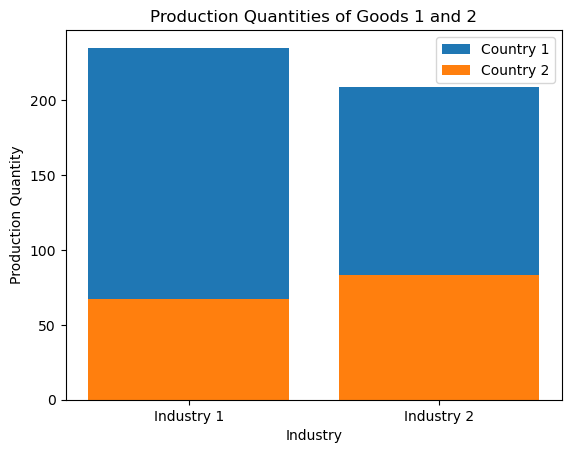

In [10]:
#code vizualization

# Plotting the production quantities
country_labels = ['Country 1', 'Country 2']
industry_labels = ['Industry 1', 'Industry 2']
production_quantities = [[Q11, Q21], [Q12, Q22]]

fig, ax = plt.subplots()

# Create bar plots
for i in range(len(country_labels)):
    ax.bar(industry_labels, production_quantities[i], label=country_labels[i])

# Add labels and title
ax.set_xlabel('Industry')
ax.set_ylabel('Production')
ax.set_title('Production Quantities for both Industries')

# Add legend
ax.legend()

# Display the plot
plt.show()

As an extension we want to see how the optimal behavior of a country changes with different shocks, hence we consider: 

- An Earthquake in country 1 that destroys capital: $K$ falls 
- Technological improvment in country 1: $A1$ increases
- A Policy that allows for more Migration leading to more Laborforce in country 1: $L1$ increases

We want to test these adjusments under ceteris paribus assumption. 

In [ ]:
#code extension



Add concise conclusion. 

## Analytical solution

If your model allows for an analytical solution, you should provide here.

You may use Sympy for this. Then you can characterize the solution as a function of a parameter of the model.

To characterize the solution, first derive a steady state equation as a function of a parameter using Sympy.solve and then turn it into a python function by Sympy.lambdify. See the lecture notes for details. 